## Проект по эконометрике
Владивосток (id = 92) и Казань (id = 45) \
2010, 2017

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)




In [2]:
path_2010 = 'data_individuals_2010.sav'
path_2017 = 'data_individuaks_2017.sav'

In [4]:
df_2010 = pd.read_spss(path_2010)
df_2017 = pd.read_spss(path_2017)

Владивосток - 0,   Казань - 1

In [5]:
# VladV_2010 = df_2010[df_2010['region'] == 'Владивосток']
# VladV_2017 = df_2017[df_2017['region'] == 'Владивосток']
# Kazan_2010 = df_2010[df_2010['region'] == 'Казань']
# Kazan_2017 = df_2017[df_2017['region'] == 'Казань']
data_2010 = df_2010[(df_2010['region'] == 'Владивосток') | (df_2010['region'] == 'Казань')].dropna(subset = ['oj13.2'], axis = 0)
data_2017 = df_2017[(df_2017['region'] == 'Владивосток') | (df_2017['region'] == 'Казань')].dropna(subset = ['vj13.2'], axis = 0)
data_2010 = data_2010[~(data_2010['oj13.2'].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']))]
data_2017 = data_2017[~(data_2017['vj13.2'].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']))]
data_2010['oj13.2'] = data_2010['oj13.2'].cat.remove_unused_categories()
data_2017['vj13.2'] = data_2017['vj13.2'].cat.remove_unused_categories()
data_2010['oj13.2'] = data_2010['oj13.2'].astype(float)
data_2017['vj13.2'] = data_2017['vj13.2'].astype(float)
data_2010 = data_2010[data_2010['oj13.2'] > 0] #удалил приколистов
data_2017 = data_2017[data_2017['vj13.2'] > 0] #удалил приколистов
data_2010['region'] = data_2010['region'].map({'Владивосток': 0, 'Казань': 1})
data_2017['region'] = data_2017['region'].map({'Владивосток': 0, 'Казань': 1})

In [5]:
#Изучаем насколько пересекаются группы
#idind - сквозной идентификатор сквозь года
list_2010 = data_2010['idind'].to_list()
list_2017 = data_2017['idind'].to_list()
counter = 0
for elem in list_2017:
    if elem in list_2010:
        counter += 1
print(counter/len(list_2017))

0.34801762114537443


In [ ]:
#Поисследуем выборки: 
data_2010_Kazan = data_2010[data_2010['region'] == 1]
data_2010_Vlad = data_2010[data_2010['region'] == 0]
data_2017_Kazan = data_2017[data_2017['region'] == 1]
data_2017_Vlad = data_2017[data_2017['region'] == 0]

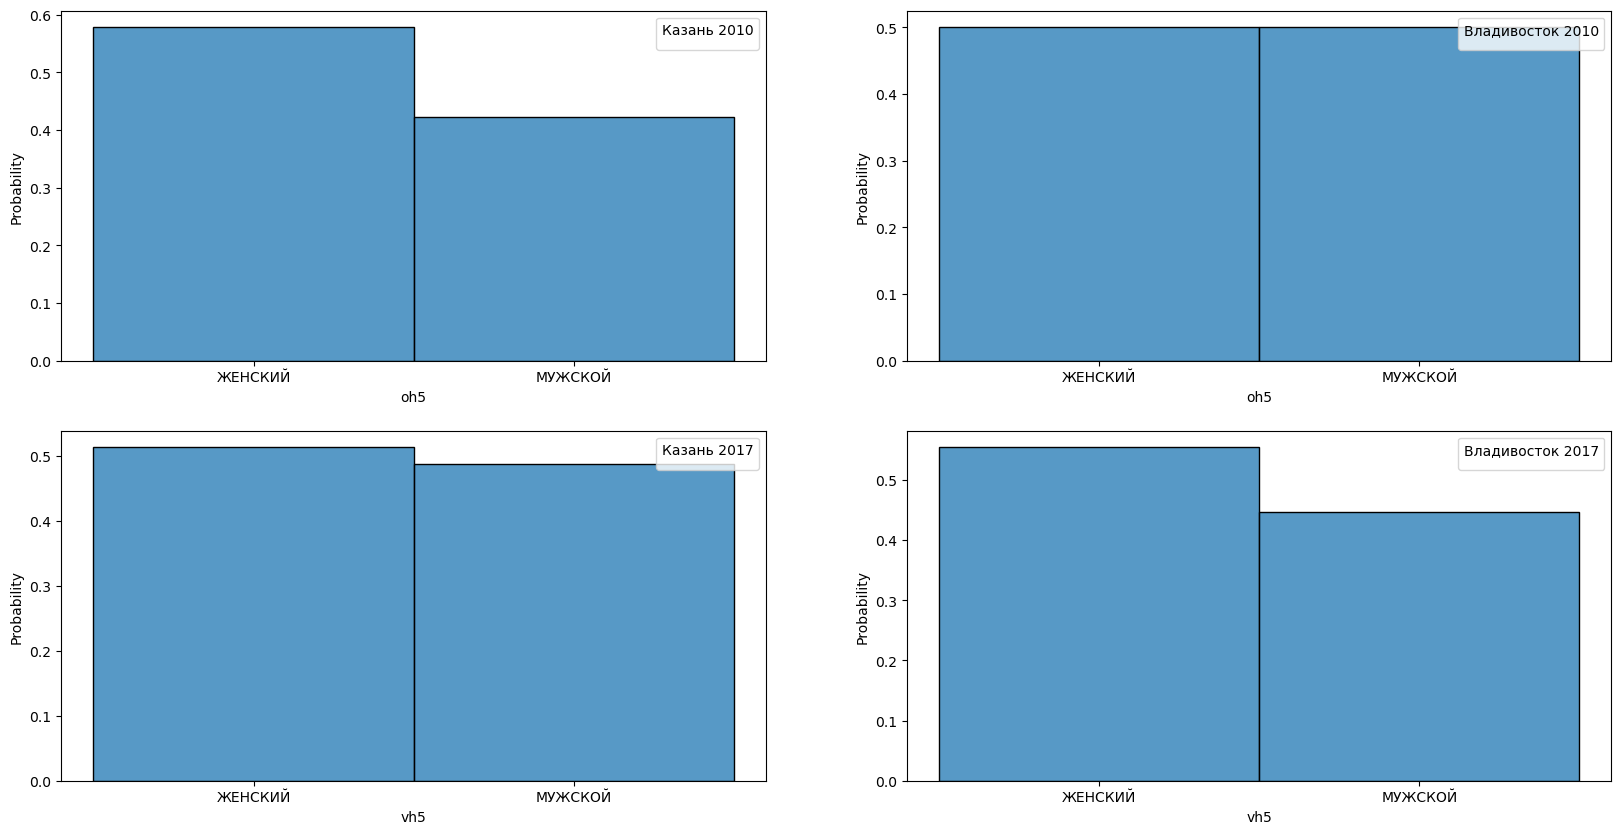

In [6]:

fig, ax = plt.subplots(2,2, figsize = (20,10))
ax1, ax2, ax3,  ax4 = ax[0,0], ax[0,1], ax[1,0], ax[1,1]
sns.histplot(data_2010_Kazan, x = 'oh5', ax = ax1, stat = 'probability')
ax1.legend(title='Казань 2010')  
sns.histplot(data_2010_Vlad, x = 'oh5', ax = ax2, stat = 'probability')
ax2.legend(title='Владивосток 2010')  
sns.histplot(data_2017_Kazan, x = 'vh5', ax = ax3, stat = 'probability')
ax3.legend(title='Казань 2017')  
sns.histplot(data_2017_Vlad, x = 'vh5', ax = ax4, stat = 'probability')
ax4.legend(title='Владивосток 2017')  
plt.show()


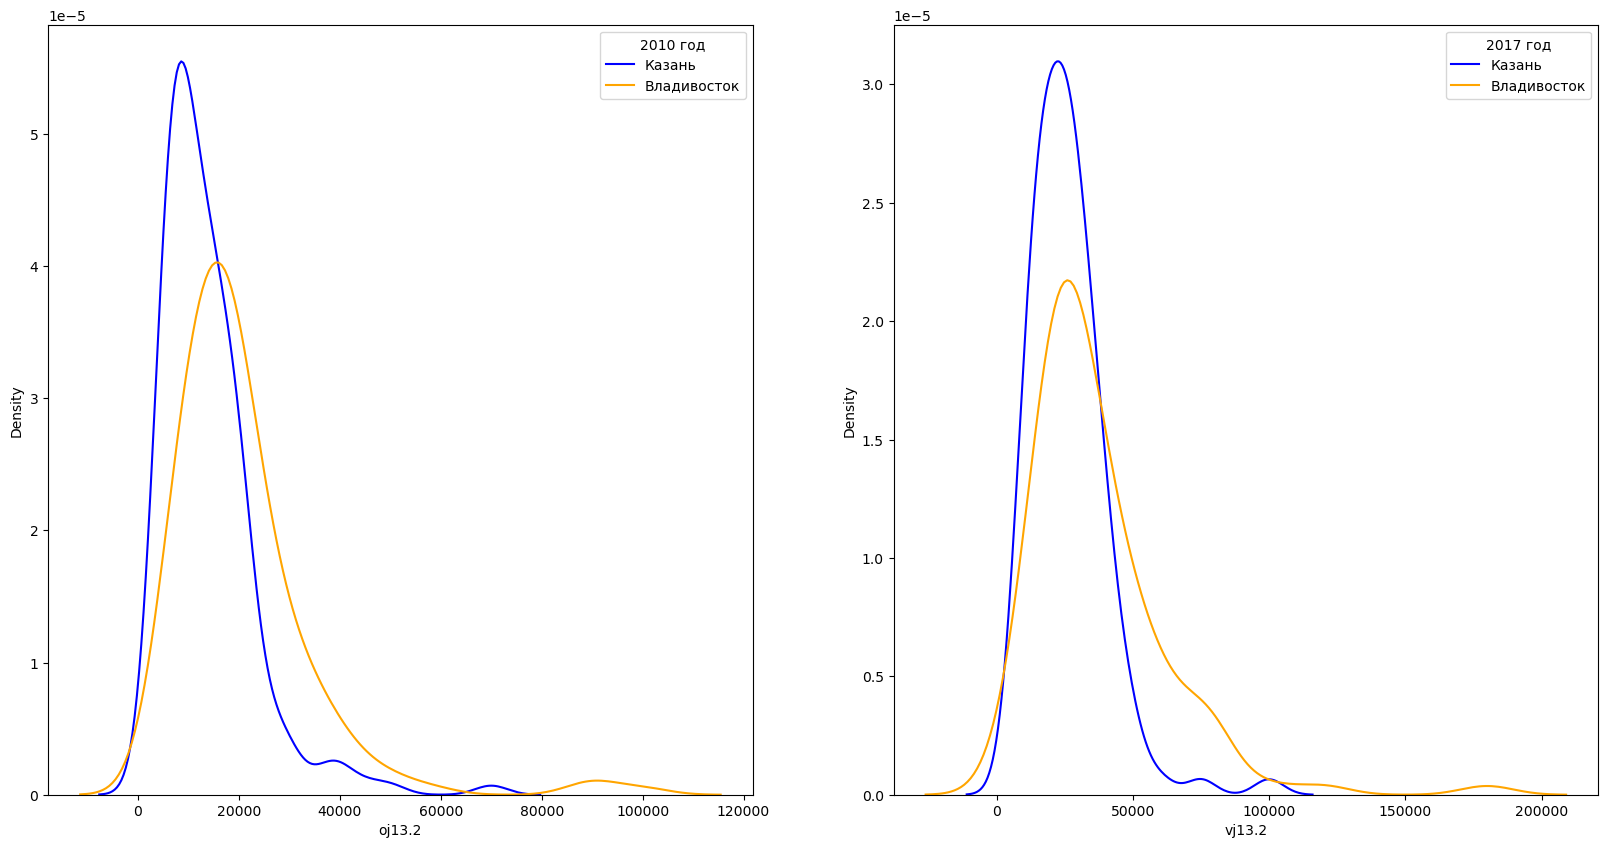

In [7]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
ax1, ax2 = ax[0], ax[1]
sns.kdeplot(data = data_2010_Kazan, ax = ax1, x = 'oj13.2', color = 'blue', label = 'Казань')
sns.kdeplot(data = data_2010_Vlad, ax = ax1, x = 'oj13.2', color = 'orange', label = 'Владивосток')
ax1.legend(title = '2010 год')
sns.kdeplot(data = data_2017_Kazan, ax = ax2, x = 'vj13.2', color = 'blue', label = 'Казань')
sns.kdeplot(data = data_2017_Vlad, ax = ax2, x = 'vj13.2', color = 'orange', label = 'Владивосток')
ax2.legend(title = '2017 год')
plt.show()

Явно видим, что таргет распределен не нормально => логарифмируем

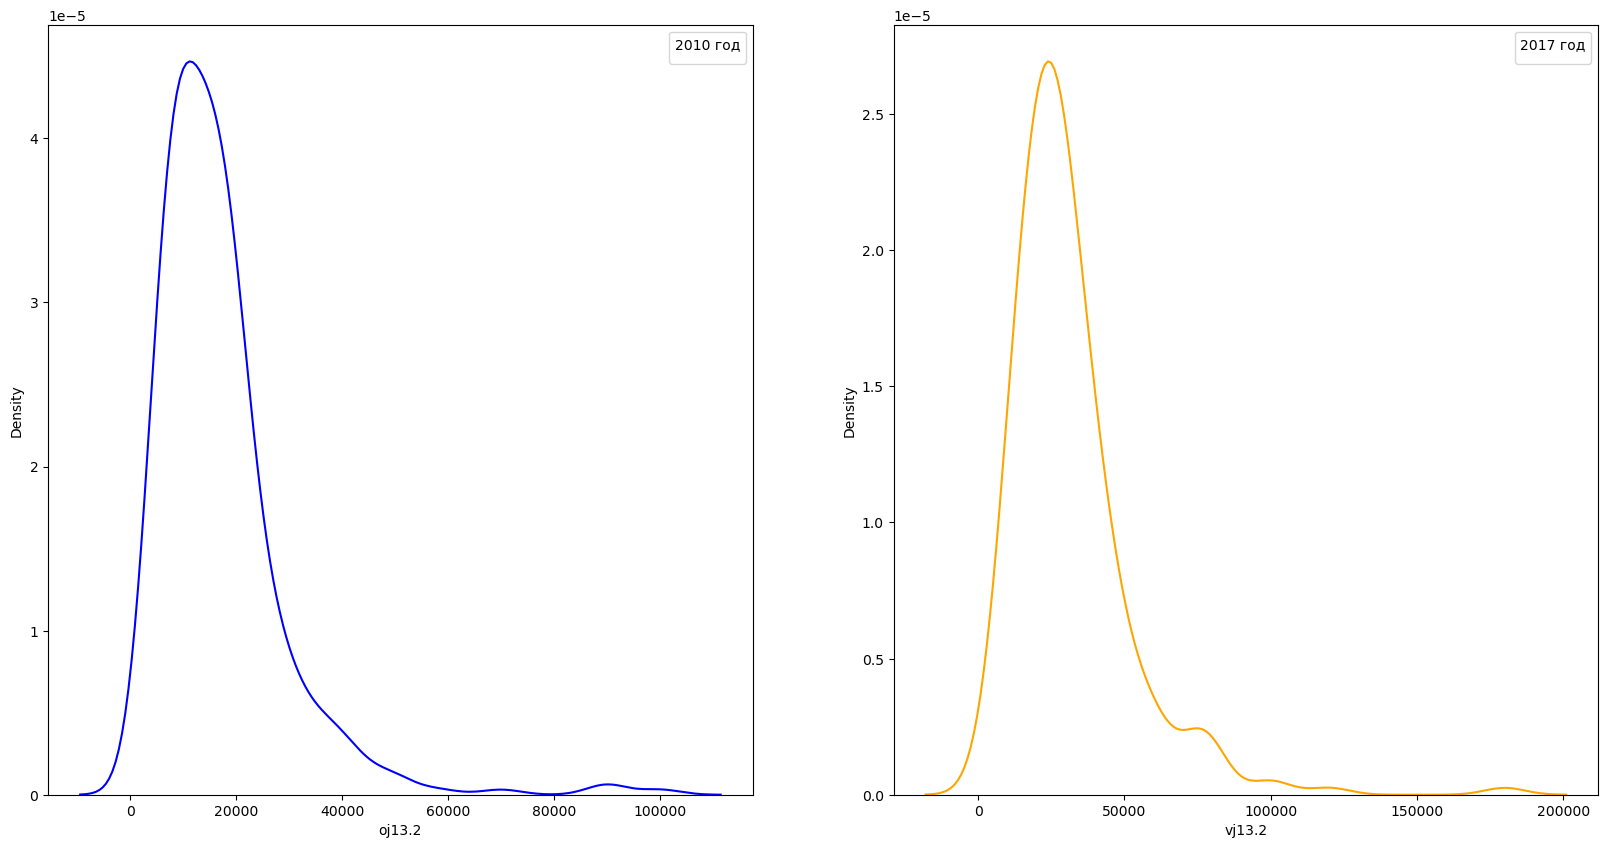

In [8]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, ax = plt.subplots(1,2, figsize = (20,10))
ax1, ax2 = ax[0], ax[1]
sns.kdeplot(data = data_2010, ax = ax1, x = 'oj13.2', color = 'blue')
ax1.legend(title = '2010 год')
sns.kdeplot(data = data_2017, ax = ax2, x = 'vj13.2', color = 'orange')
ax2.legend(title = '2017 год')
plt.show()

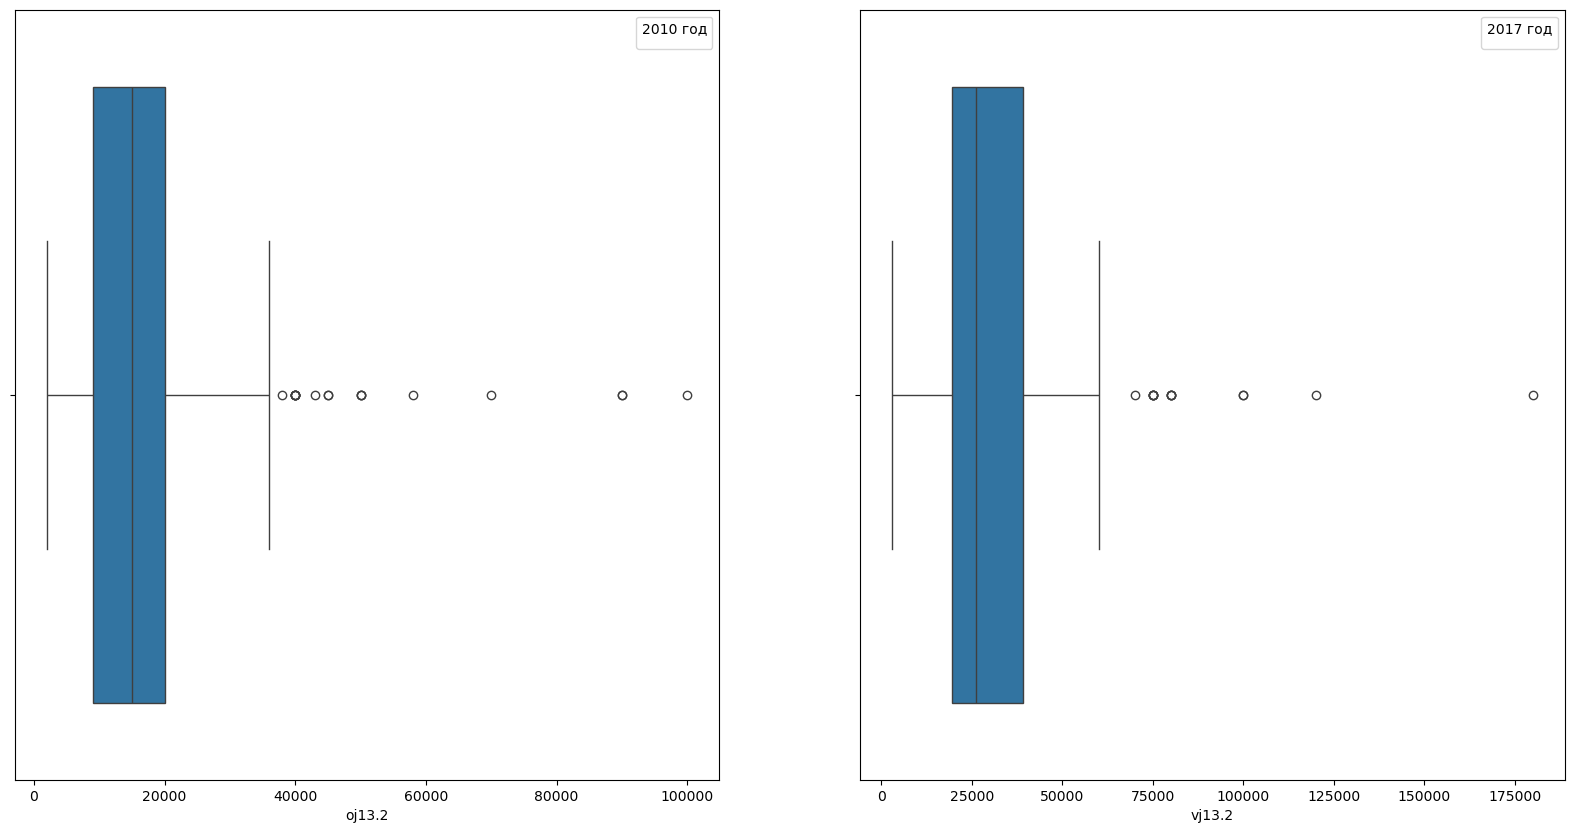

In [9]:

fig, ax = plt.subplots(1,2, figsize = (20,10))
ax1, ax2 = ax[0], ax[1]
sns.boxplot(data = data_2010, x = 'oj13.2', ax = ax1)
ax1.legend(title = '2010 год')
sns.boxplot(data = data_2017, x = 'vj13.2', ax = ax2)
ax2.legend(title = '2017 год')
plt.show()

In [10]:
print(data_2010.shape)
print(data_2017.shape)

(338, 927)
(227, 929)


In [ ]:
mask_2010 = (data_2010.isnull().sum() / len(data_2010) < 0.6)
mask_2017 = (data_2017.isnull().sum() / len(data_2017) < 0.6)

In [6]:

def classify_education_level(education_str):
    """
    Классифицирует уровень образования на 4 категории:
    1. Среднее общее
    2. Профессиональное
    3. Высшее
    4. Неизвестно
    
    Args:
        education_str (str): Строка с описанием уровня образования
        
    Returns:
        str: Категория образования
    """
    if pd.isna(education_str):
        return 'Неизвестно'
    
    # Приводим к нижнему регистру для надежного сравнения
    edu_lower = str(education_str).lower().strip()
    
    # 1. Группа "Неизвестно" (приоритетная проверка)
    unknown_keywords = ['затрудняюсь', 'нет ответа', 'отказ от ответа', 'не знаю', 'не помню']
    if any(keyword in edu_lower for keyword in unknown_keywords):
        return 'Неизвестно'
    
    # 2. Группа "Высшее образование"
    higher_edu_keywords = [
        'высшем учебном заведении', 
        'аспирантура', 
        'диплом о высшем образовании',
        'бакалавриат',
        'магистратура',
        'специалитет'
    ]
    if any(keyword in edu_lower for keyword in higher_edu_keywords):
        return 'Высшее'
    
    # 3. Группа "Профессиональное образование"
    prof_edu_keywords = [
        'птус дипломом',
        'птубез диплома',
        'техникум с дипломом',
        'техникум без диплома',
        'професс. обр. с дипломом',
        'професс. обр. без диплома',
        'профессиональное образование',
        'среднее профессиональное'
    ]
    if any(keyword in edu_lower for keyword in prof_edu_keywords):
        return 'Профессиональное'
    
    # 4. Группа "Среднее общее образование"
    secondary_edu_keywords = [
        'классов школы',
        'аттестат о ср. образовании',
        'аттестат о среднем образовании',
        'незак. среднее',
        'неполное среднее',
        'основное общее'
    ]
    if any(keyword in edu_lower for keyword in secondary_edu_keywords):
        return 'Среднее общее'
    
    # 5. Фолбэк для неопределенных случаев
    return 'Неизвестно'



In [7]:
def classify_firm_size_simple(value):
    # 1. Обрабатываем "ЗАТРУДНЯЮСЬ ОТВЕТИТЬ" как микропредприятия
    if isinstance(value, str) and 'затрудняюсь' in value.lower():
        return 'Микро'  # ← КЛЮЧЕВОЕ ИЗМЕНЕНИЕ
    
    # 2. Для редких "НЕТ ОТВЕТА"/"ОТКАЗ" создаём dummy позже
    if pd.isna(value) or str(value).strip() in ['НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА', '']:
        return 'Микро'
    
    # 3. Обработка числовых значений
    if isinstance(value, (int, float)):
        if value <= 15: return 'Микро'
        elif value <= 100: return 'Малое'
        elif value <= 250: return 'Среднее'
        else: return 'Крупное'
    
    # 4. Обработка текстовых диапазонов
    value = str(value).lower()
    if any(x in value for x in ['до 15', '<15', 'микро']):
        return 'Микро'
    elif any(x in value for x in ['16-100', 'малое']):
        return 'Малое'
    elif any(x in value for x in ['101-250', 'средн']):
        return 'Среднее'
    elif any(x in value for x in ['>250', 'крупн']):
        return 'Крупное'
    
    return np.nan  # Остальные случаи → пропуск



In [65]:
def classify_diplom(value):
    if value in ['НЕТ ОТВЕТА', 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']:
        return 'законченное среднее образование'
    elif value in ['незаконченное среднее образование (7 - 8 кл)', 'незаконченное среднее образование (7 - 8 кл) + что-то еще']:
        return 'незаконченное среднее'
    return value

def classify_build_year(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return 'неизвестно'
    return value

def classify_marry(value):
    if value in ['Состоите в повторном зарегистрированном браке', 
                 'Состоите в первом зарегистрированном браке',
                 'ОФИЦИАЛЬНО ЗАРЕГИСТРИРОВАНЫ, НО ВМЕСТЕ НЕ ЖИВУТ'
                 ]:
        return 'Состоят в браке'
    elif value in ['Вдовец/вдова']:
        return value
    return 'Не в браке'
def classify_language(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return 'Нет'
    return value
def classify_government(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return 'Нет'
    return value
def classify_smoking(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return 'Нет'
    return value
def classify_hard_work(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return 'Нет'
    return value
def classify_time_job(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return np.nan
    return value




In [66]:
def good_df(df, o):
    df[f'{o}_age'] = df[f'{o}_age'].astype(int)
    cat_features = df.select_dtypes(['category'])
    for elem in cat_features.columns:
        df[elem] = df[elem].cat.remove_unused_categories()
    df[f'{o}_educ_trans'] = df[f'{o}_educ'].apply(classify_education_level)
    df[f'{o}j13_trans'] = df[f'{o}j13'].apply(classify_firm_size_simple)
    df['log_target'] = df[f'{o}j13.2'].apply(lambda x: np.log(x))
    df = df.rename(columns={f'{o}j4.1':f'{o}j4_1', f'{o}j13.2' : f'{o}j13_2', 
                            f'{o}j72.173': f'{o}j72_173', f'{o}j21.3': f'{o}j21_3', f'{o}j6.2': f'{o}j6_2'})
    
    if o == 'o':
        df[f'{o}j72_173'] = df[f'{o}j72_173'].fillna(0).astype(int)#Пообсуждать
    else:
        df[f'{o}j72_173'] = df[f'{o}j72_173'].apply(lambda x: 0 if x == 'НЕТ ДЕТЕЙ МОЛОЖЕ 18' else x).fillna(0)

    if 'o_diplom_1' in df.columns:
        df[f'{o}_diplom_1'] = df[f'{o}_diplom_1'].apply(classify_diplom)
    else:
        df[f'{o}_diplom'] = df[f'{o}_diplom'].apply(classify_diplom)
    
    if 'oj308' in df.columns:
        df[f'{o}j308'] = df[f'{o}j308'].apply(classify_build_year)
    
    df[f'{o}j322'] = df[f'{o}j322'].apply(classify_marry)
    df[f'{o}j260'] = df[f'{o}j260'].apply(classify_language)#.cat.remove_unused_categories()
    df[f'{o}j23'] = df[f'{o}j23'].apply(classify_government)
    df[f'{o}m71'] = df[f'{o}m71'].apply(classify_smoking)
    df[f'{o}j21_3'] = df[f'{o}j21_3'].apply(classify_hard_work)
    df[f'{o}j6_2'] = df[f'{o}j6_2'].apply(classify_time_job)
    return df



In [67]:
data_2010_base = data_2010[['oj13.2', 'o_educ', 'o_age', 'oj4.1', 'o_occup08', 'oj13', 'oh5', 
                            'region', 'o_diplom_1', 'oj308', 'oj322', 'oj72.173', 'oj260', 'oj23', 'om71', 'oj21.3', 'oj6.2']]
data_2010_base = good_df(data_2010_base, 'o')


C:\Users\User\AppData\Local\Temp\ipykernel_16688\1396043863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{o}_age'] = df[f'{o}_age'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_16688\1396043863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[elem] = df[elem].cat.remove_unused_categories()
C:\Users\User\AppData\Local\Temp\ipykernel_16688\1396043863.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [68]:
data_2017_base = data_2017[['vj13.2', 'v_educ', 'v_age', 'vj4.1', 'v_occup08', 'vj13', 'vh5', 'region', 'v_diplom', 'vj322',
                             'vj72.173', 'vj260', 'vj23', 'vm71', 'vj21.3', 'vj6.2']]
data_2017_base = good_df(data_2017_base, 'v')

C:\Users\User\AppData\Local\Temp\ipykernel_16688\1396043863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{o}_age'] = df[f'{o}_age'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_16688\1396043863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[elem] = df[elem].cat.remove_unused_categories()
C:\Users\User\AppData\Local\Temp\ipykernel_16688\1396043863.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [70]:
data_2017_base.isnull().sum()

vj13_2           0
v_educ           0
v_age            0
vj4_1            0
v_occup08        0
vj13             0
vh5              0
region           0
v_diplom         0
vj322            0
vj72_173         0
vj260            0
vj23             0
vm71             0
vj21_3           0
vj6_2           10
v_educ_trans     0
vj13_trans       0
log_target       0
dtype: int64

In [71]:
data_2010_base.to_csv('data_2010_final.csv', index=False)
data_2017_base.to_csv('data_2017_final.csv', index = False)

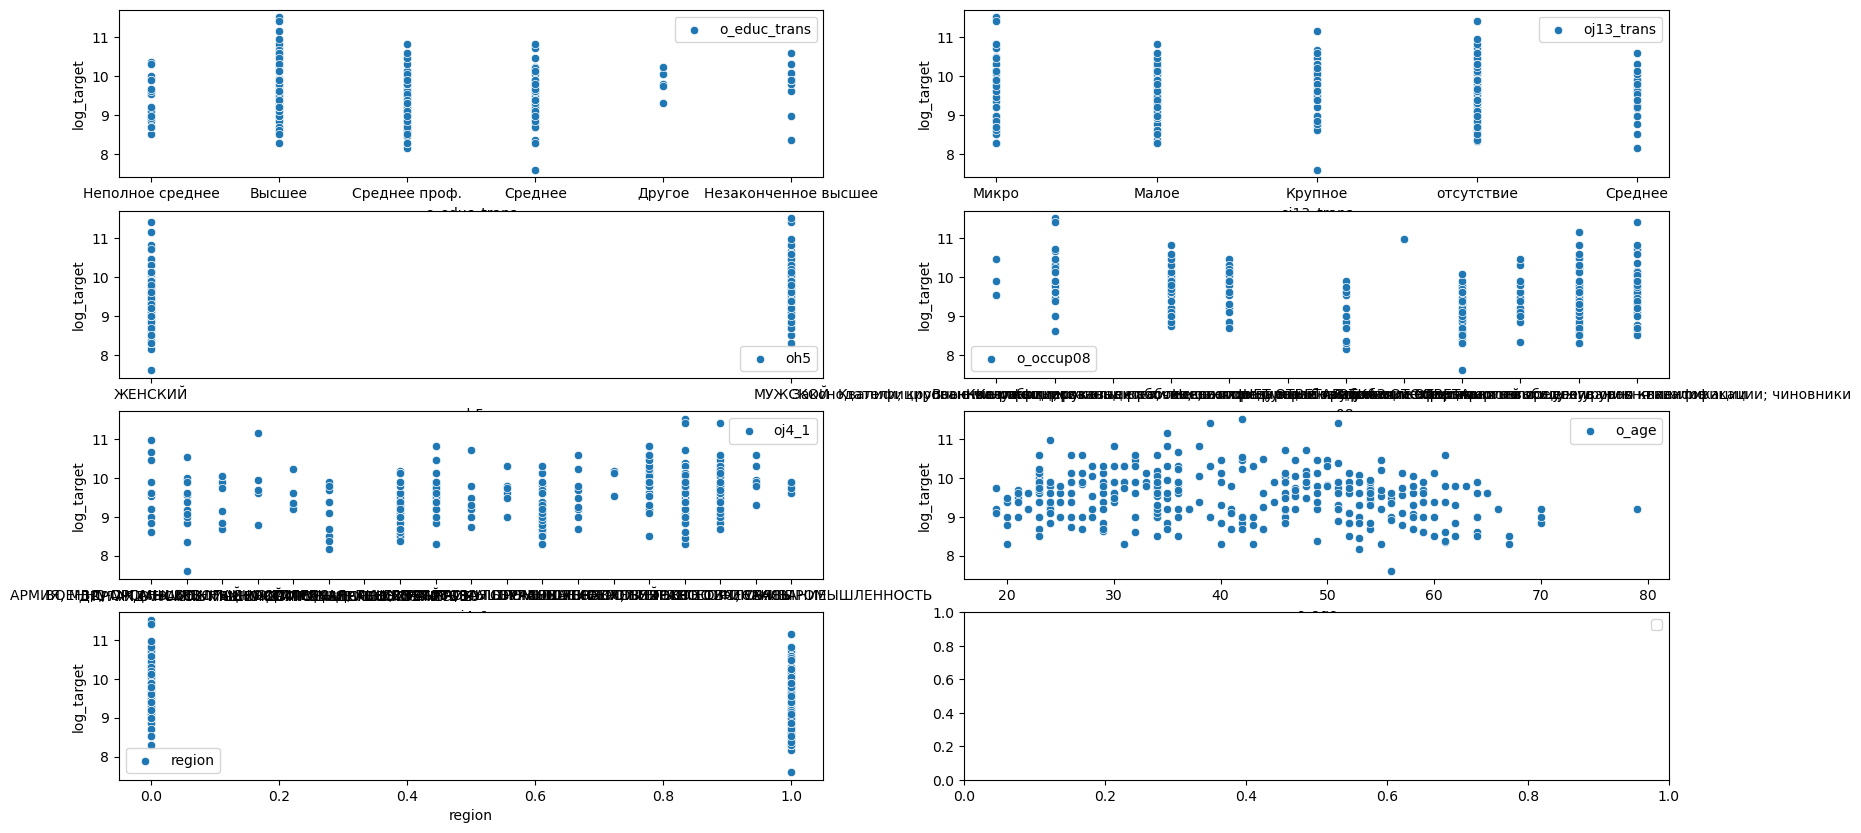

In [ ]:
fig, ax = plt.subplots(4,2, figsize = (20,10))
features = ['o_educ_trans', 'oj13_trans', 'oh5', 'o_occup08', 'oj4_1', 'o_age', 'region']
for axi, elem in zip(ax.flat, features):
    sns.scatterplot(data = data_2010_base, x = elem, y = 'log_target', label = elem, ax = axi)
    plt.legend()


In [134]:
data_2010_base['oj260'].value_counts()

oj260
Нет                     251
Да                       85
НЕТ ОТВЕТА                2
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ      0
ОТКАЗ ОТ ОТВЕТА           0
Name: count, dtype: int64

In [141]:
formula = "log_target ~ C(oh5) + o_age + I(o_age**2) + C(oj4_1) + o_occup08 + C(oj13_trans, Treatment(reference = 'Малое')) + C(region) + C(o_diplom_1) + C(oj308) + C(oj322) + C(oj72_173) + C(oj260)"

model = smf.ols(formula=formula, data=data_2010_base).fit(cov_type='HC3')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     11.55
Date:                Mon, 22 Dec 2025   Prob (F-statistic):           7.84e-43
Time:                        03:33:46   Log-Likelihood:                -169.01
No. Observations:                 338   AIC:                             430.0
Df Residuals:                     292   BIC:                             605.9
Df Model:                          45                                         
Covariance Type:                  HC3                                         
==================================================================================================================================================
                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                          9.1905      0.365     25.157      0.000       8.474       9.906
C(oh5)[T.МУЖСКОЙ]                                                                  0.2394      0.069      3.494      0.000       0.105       0.374
C(oj4_1)[T.ВОЕННО-ПРОМЫШЛЕННЫЙ КОМПЛЕКС]                                          -0.1228      0.227     -0.540      0.589      -0.568       0.323
C(oj4_1)[T.ГРАЖДАНСКОЕ МАШИНОСТРОЕНИЕ]                                            -0.0424      0.246     -0.172      0.863      -0.525       0.440
C(oj4_1)[T.ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ]                                  0.3310      0.383      0.864      0.388      -0.420       1.082
C(oj4_1)[T.ДРУГОЕ]                                                                 0.1834      0.230      0.798      0.425      -0.267       0.634
C(oj4_1)[T.ЖИЛИЩНО-КОММУНАЛЬНОЕ ХОЗЯЙСТВО]                                        -0.1336      0.140     -0.953      0.341      -0.408       0.141
C(oj4_1)[T.ЗДРАВООХРАНЕНИЕ]                                                       -0.1158      0.121     -0.955      0.340      -0.354       0.122
C(oj4_1)[T.ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ]                                         0.0776      0.132      0.588      0.556      -0.181       0.336
C(oj4_1)[T.НАУКА, КУЛЬТУРА]                                                       -0.0978      0.304     -0.322      0.748      -0.694       0.498
C(oj4_1)[T.НЕФТЕГАЗОВАЯ ПРОМЫШЛЕННОСТЬ]                                            0.0644      0.295      0.218      0.828      -0.515       0.643
C(oj4_1)[T.ОБРАЗОВАНИЕ]                                                           -0.4003      0.124     -3.240      0.001      -0.642      -0.158
C(oj4_1)[T.ОРГАНЫ УПРАВЛЕНИЯ]                                                     -0.0338      0.181     -0.186      0.852      -0.389       0.322
C(oj4_1)[T.СЕЛЬСКОЕ ХОЗЯЙСТВО]                                                     0.7412      0.204      3.636      0.000       0.342       1.141
C(oj4_1)[T.СТРОИТЕЛЬСТВО]                                                          0.2084      0.121      1.724      0.085      -0.028       0.445
C(oj4_1)[T.ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ]                                         0.1301      0.103      1.268      0.205      -0.071       0.331
C(oj4_1)[T.ТРАНСПОРТ, СВЯЗЬ]                                                       0.1162      0.110      1.055      0.291      -0.100       0.332
C(oj4_1)[T.ФИНАНСЫ]                                                                0.2268      0.142      1.594      0.111      -0.052       0.

In [63]:
data_2010_base.head()

,oj13_2,o_educ,o_age,oj4_1,o_occup08,oj13,oh5,region,o_educ_trans,oj13_trans,log_target
487,6000.0,7-9 классов школы (незак. средн) + ПТУ с дипломом,54,ЗДРАВООХРАНЕНИЕ,Неквалифицированные рабочие всех отраслей,10.0,ЖЕНСКИЙ,1.0,Среднее общее,Микро,8.699515
492,5700.0,есть диплом о высшем образовании,29,ОБРАЗОВАНИЕ,Специалисты высшего уровня квалификации,30.0,ЖЕНСКИЙ,1.0,Высшее,Малое,8.648221
493,12000.0,техникум с дипломом,54,ЗДРАВООХРАНЕНИЕ,Специалисты среднего уровня квалификации; чино...,600.0,ЖЕНСКИЙ,1.0,Профессиональное,Крупное,9.392662
494,8000.0,аспирантура и т.п. без диплома,28,ОБРАЗОВАНИЕ,Законодатели; крупные чиновники; руководители ...,2500.0,ЖЕНСКИЙ,1.0,Высшее,Крупное,8.987197
495,7000.0,техникум с дипломом,52,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",Работники сферы торговли и услуг,10.0,ЖЕНСКИЙ,1.0,Профессиональное,Микро,8.853665


In [139]:
data_2010_base['oj4_1'].cat.categories[1:]

Index(['ВОЕННО-ПРОМЫШЛЕННЫЙ КОМПЛЕКС', 'ГРАЖДАНСКОЕ МАШИНОСТРОЕНИЕ',
       'ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ', 'ДРУГОЕ',
       'ЖИЛИЩНО-КОММУНАЛЬНОЕ ХОЗЯЙСТВО', 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
       'ЗДРАВООХРАНЕНИЕ', 'ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ', 'НАУКА, КУЛЬТУРА',
       'НЕФТЕГАЗОВАЯ ПРОМЫШЛЕННОСТЬ', 'ОБРАЗОВАНИЕ', 'ОРГАНЫ УПРАВЛЕНИЯ',
       'СЕЛЬСКОЕ ХОЗЯЙСТВО', 'СТРОИТЕЛЬСТВО', 'ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ',
       'ТРАНСПОРТ, СВЯЗЬ', 'ФИНАНСЫ', 'ЭНЕРГЕТИЧЕСКАЯ ПРОМЫШЛЕННОСТЬ'],
      dtype='object')

(16867, 927)

In [46]:
data_2010['oj21.3'].isnull().sum()

np.int64(0)

In [42]:
data_2010['oj6.2'].value_counts()

oj6.2
40.0                    153
48.0                     45
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ     16
60.0                     14
36.0                      9
                       ... 
119.0                     0
126.0                     0
168.0                     0
НЕТ ОТВЕТА                0
ОТКАЗ ОТ ОТВЕТА           0
Name: count, Length: 97, dtype: int64

In [ ]:
data_2017['vj21.3']

np.int64(0)

In [ ]:
data_2017['vj6.2']

np.int64(0)